In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import scipy.stats as stats

In [2]:
df=pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipykernel_18/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

/tmp/ipykernel_18/1642527001.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age QQ Plot')

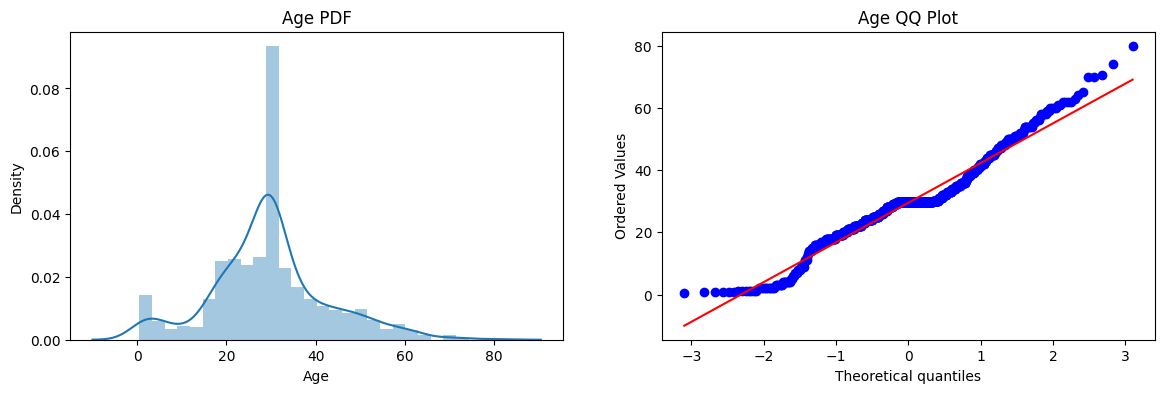

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

/tmp/ipykernel_18/105768040.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Fare QQ Plot')

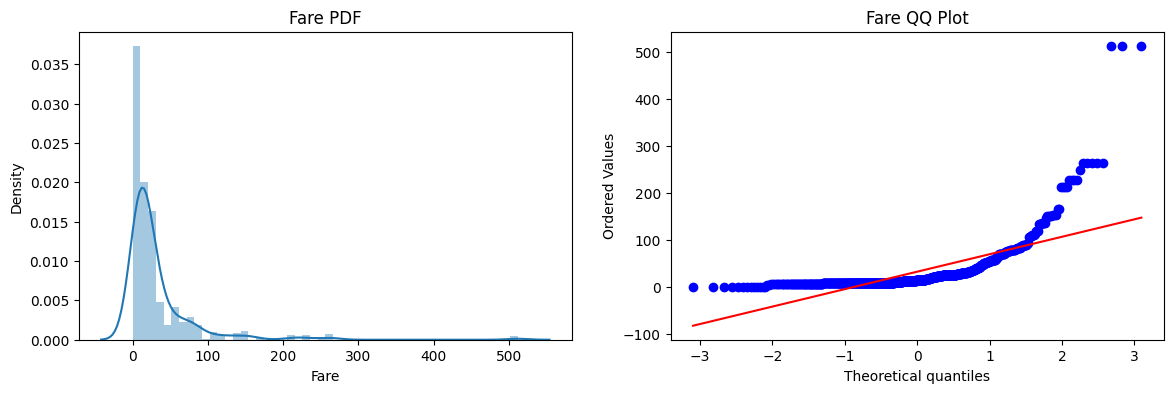

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [15]:
trf=FunctionTransformer(func=np.log1p)

In [16]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.fit_transform(x_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

y_pred = clf.predict(x_test_trans)
y_pred1 = clf2.predict(x_test_trans)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [18]:
x_trans=trf.fit_transform(x)

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_trans,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577403245942572


Text(0.5, 1.0, 'Fare after log')

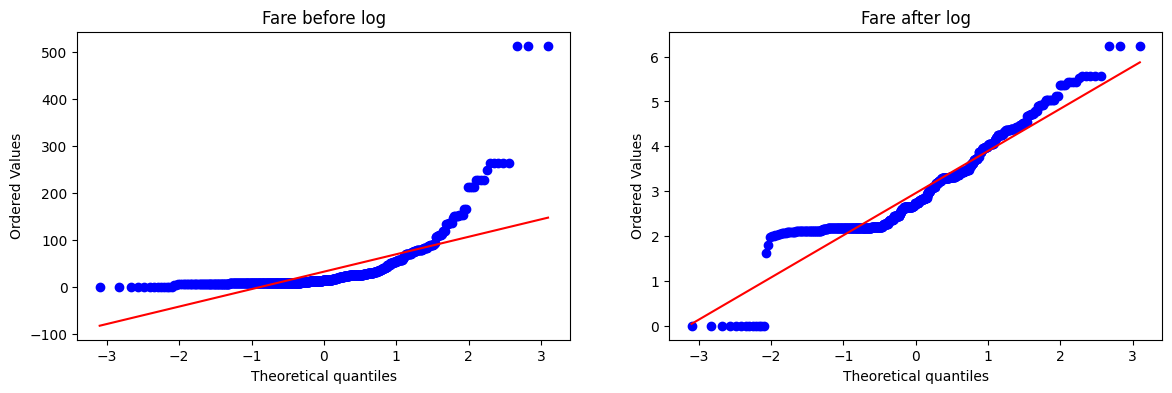

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(x_train_trans['Fare'],dist='norm',plot=plt)
plt.title('Fare after log')

Text(0.5, 1.0, 'Age after log')

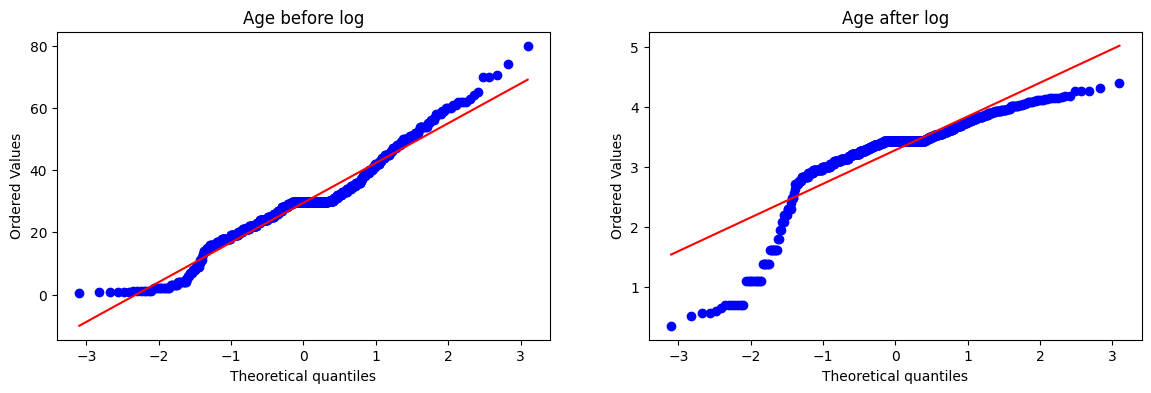

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(x_train_trans['Age'],dist='norm',plot=plt)
plt.title('Age after log')

In [22]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_trans1=trf2.fit_transform(x_train)
x_test_trans1=trf2.fit_transform(x_test)


In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trans1,y_train)
clf2.fit(x_train_trans1,y_train)
    
y_pred = clf.predict(x_test_trans1)
y_pred2 = clf2.predict(x_test_trans1)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [24]:
X_trans2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_trans2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_trans2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6554681647940075
